

# TMDB Movies DataSet Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Is there any consistent formula which helps a movie to break the records at box-office? Are the movies which are a commercial success are highly-rated?Which genres are most popular from year to year?. This DataSet contains information about 10000 movies collected from TMDB Database , including movie rating and revenue it generated.

#### Attributes:
  - __id__ : id of the movie
  - __imdb_id__ : id of the movie in imdb database
  - __popularity__ : cumulative decided by number of star ratings
  - __budget__ : budget of the movie
  - __revenue__ : revenue generated by the movie
  - __original_title__ : title of the movie
  - __cast__ : cast of the movie seperated by '|' symbol
  - __homepage__ : link to the homepage of the movie
  - __director__ : name of the director of the movie
  - __tagline__ : tagline of the movie
  - __keywords__ : keywords related to the movie
  - __overview__ : summary of the movie 
  - __runtime__ : runtime of the movie in minutes
  - __genres__ : genres of the movie seperated by pipe symbol '|'
  - __production_companies__ : production companies for the movie seperated by pipe symbol
  - __release_date__ : release date of the movie in MM/DD/YY format 
  - __vote_count__ : no. of votes or ratings
  - __vote_average__ : average of ratings of the movie
  - __release_year__ : release year of the movie
  - __budget_adj__ : budget of the movie in terms of 2010 dollars, accounting for inflation over time.
  - __revenue_adj__ : revenue of the movie in terms of 2010 dollars, accounting for inflation over time.


In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [175]:
df_v1=pd.read_csv('tmdb-movies.csv')
df_v1.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [176]:
print("No. of rows in DataSet:",df_v1.shape[0])
print("No. of columns in DataSet:",df_v1.shape[1])

No. of rows in DataSet: 10866
No. of columns in DataSet: 21


In [177]:
df_v1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [178]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning
we can see that there are some unnecessary columns which are to be deleted and there are some rows which are also to be deleted because they have null values which cannot be imputed with mean as they are categorical. We need to delete the duplicate rows which are present in dataset.

In [179]:
df_v1.drop(['homepage','tagline','keywords','imdb_id','overview','cast','id'],axis=1,inplace=True) 
#Dropping unnecessary columns as They'll be of no use in our analysis 

In [180]:
df_v1.duplicated().sum() #find No. of duplicated rows in DataSet, in this case it is 1.

1

In [181]:
df_v1[df_v1.duplicated()] #this is the duplicated line which have to drop

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [182]:
df_v1.drop_duplicates(inplace=True)#removing duplicated rows.

In [183]:
df_v1.duplicated().any() #just ensure there are no duplicate rows left

False

In [184]:
df_v1.isnull().sum() 
#Here We can see There are more than 1000 null values in production_companies column. 
#it has Categorical variables,therefore they cannot be imputed!
#As it has large proportion of null values, If I delete those rows, it might affect the data for a fair analysis.
#Hence, production_companies column should also be removed as it should not affect the results of analysis of other columns

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [185]:
df_v1.drop(['production_companies'],axis=1,inplace=True)

In [186]:
#remove the rows in which any other column is null! as the no. of rows which willb be removed is less, They might not affect the analysis
df_v1.dropna(how='any',axis=0,inplace=True)

In [187]:
df_v1.isnull().sum() #to ensure that we dont have null values.

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [188]:
df_v1.nunique()

popularity        10750
budget              556
revenue            4702
original_title    10507
director           5056
runtime             245
genres             2031
release_date       5886
vote_count         1289
vote_average         71
release_year         56
budget_adj         2610
revenue_adj        4839
dtype: int64

In [189]:
df_v1[df_v1['budget_adj']==0].shape[0]  # As budget is Zero for 5578 movies 
#Budget 0 means may the data is note recorded correctly! therefore they may affect our analysis.
#Revenue can be 0. Maybe the movie did not make any revenue.

5636

Filling in the mean would have been a good idea if it was a few hundred rows but doing so here in this will create a skewed analysis.It is better to have less data with precise figures than have large data with skewed results.

In [190]:
df_v1=df_v1[df_v1['budget_adj']!=0]

In [191]:

df_v1.shape[0]

5164

In [192]:
df_v1.rename(columns={'original_title':'title'},inplace= True) #for better understanding of the column name

In [193]:
df_v1['release_date']=pd.to_datetime(df_v1['release_date'],format='%m/%d/%y') #converting the string to timestamp.

In [194]:
cleaned = df_v1.genres.str.split('|', expand=True)

In [195]:
cleaned.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [196]:
cleaned.columns=['genre_1','genre_2','genre_3','genre_4','genre_5']

In [197]:
df_v1=pd.concat([df_v1,cleaned],axis=1)

In [198]:
df_v1.drop(['genres'],axis=1,inplace=True)

In [199]:
df_v1.head()

,popularity,budget,revenue,title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


Now we have 2 columns for budget and revenue called budget_adj and revenue_adj respectively which have adjusted values of budget and revenue in terms of 2010 dollars , accounting for inflation over time. Therefore we can drop budget and revenue columns

In [200]:
df_v1.drop(['budget','revenue'],axis=1,inplace=True)

The values in budget_adj and revenue_adj are in form of exponentials . Therfore, 1e8 is a million and 1e9 is a billion. we can just divide the variables by 1e8 to convert them into millions.

In [201]:
df_v1['budget_adj']=df_v1['budget_adj']/(1e8)  # converting them in terms of million dollars
df_v1['revenue_adj']=df_v1['revenue_adj']/(1e8) 

In [202]:
df_v1['budget_adj']=df_v1['budget_adj'].round(2) #to round them to 2 decimal places
df_v1['revenue_adj']=df_v1['revenue_adj'].round(2)

In [203]:
df_v1.rename(columns={'budget_adj':'budget_ml','revenue_adj':'revenue_ml'},inplace=True)# to signify they are in million dollars
#in terms of 2010

In [206]:
df_v1['gross']=df_v1['revenue_ml']-df_v1['budget_ml'] # This signifies the gross(profit/loss) of a movie 
#which can be calculated by (budget-revenue)

<a id='eda'></a>
## Exploratory Data Analysis


###  Which is the most common genre?

In [241]:
a=df_v1['genre_1'].value_counts()
b=df_v1['genre_2'].value_counts()
c=df_v1['genre_3'].value_counts()
d=df_v1['genre_4'].value_counts()
e=df_v1['genre_5'].value_counts()
li=[b,c,d,e]
for i in li:
    a=a.add(i,fill_value=0)
total_genre_count=a
print(total_genre_count.sort_values(ascending= False))


Drama              2314.0
Comedy             1738.0
Thriller           1641.0
Action             1428.0
Adventure           906.0
Romance             860.0
Crime               823.0
Horror              765.0
Science Fiction     701.0
Family              521.0
Fantasy             507.0
Mystery             440.0
Animation           260.0
History             183.0
Music               169.0
War                 155.0
Western              74.0
Documentary          63.0
Foreign              33.0
TV Movie              9.0
dtype: float64


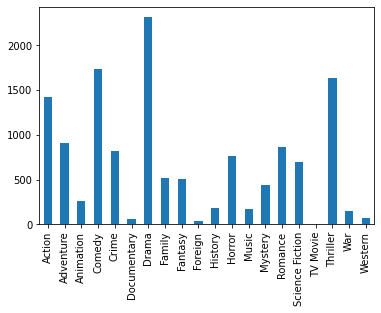

In [242]:
total_genre_count.plot.bar()

### What is the trend in Average of budget across the time period?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!